**Construct a forest fire classification  model using multi layer perceptron to predict forest fire based on forest conditions.**

In [1]:
import pandas as pd
df=pd.read_csv('Forest_fire.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,n
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,n
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,n
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,n
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,n


In [2]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Classes']=encoder.fit_transform(df['Classes'])
df=df.drop(columns=['day','month','year'])
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1, 1))

inputs=df.columns[:-1]
df[inputs]=scaler.fit_transform(df[inputs])
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,-0.066667,-0.454545,-0.066667,-1.000000,0.202593,-0.899065,-0.993443,-0.792,-0.930618,-0.966887,0
1,-0.066667,-0.272727,-0.733333,-0.845238,0.160454,-0.872897,-0.993443,-0.840,-0.915535,-0.973510,0
2,-0.466667,0.681818,0.466667,0.559524,-0.400324,-0.932710,-0.998126,-0.952,-0.951735,-0.993377,0
3,-0.600000,1.000000,-0.733333,-0.702381,-1.000000,-0.977570,-1.000000,-1.000,-0.981900,-1.000000,0
4,-0.333333,0.454545,-0.333333,-1.000000,0.173420,-0.914019,-0.931616,-0.808,-0.915535,-0.966887,0


Single hidden layer with 3 neurons

Confusion matrix
 [[22  0]
 [ 0 15]]

Accuracy :  1.0

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37


Coefficients
 [array([[ 3.45615143, -4.12472841, -1.15651652],
       [ 0.89043225, -0.97808758, -3.90094321],
       [-0.35125923,  0.22898145,  0.57995982],
       [ 2.75083096, -2.48972484,  2.38937714],
       [-5.64943317,  7.54109887, -6.2331472 ],
       [ 4.35306733, -5.83066006,  3.19799986],
       [-5.50707317,  7.04376099, -3.62122301],
       [-7.26099003,  8.47692151, -7.60643228],
       [ 1.74882644, -2.47994855,  1.10422993],
       [-4.49004893,  4.21418003, -4.89151584]]), array([[-5.76243638],
       [ 8.39204457],
       [-6.438864

Text(0, 0.5, 'Loss')

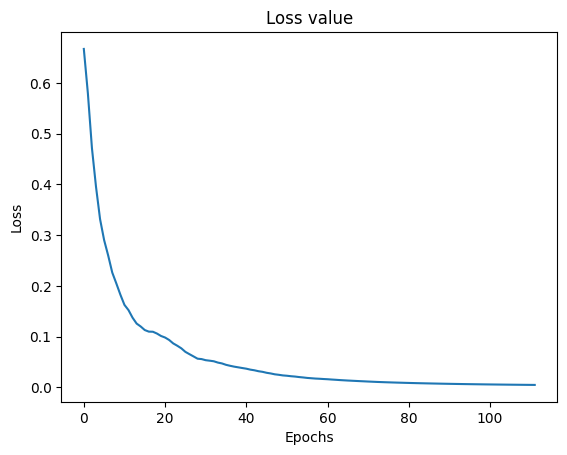

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt

X=df.values[:,:-1]
y=df.values[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

print('Single hidden layer with 3 neurons\n')

clf_model=MLPClassifier(hidden_layer_sizes=(3,),activation='logistic',max_iter=500,
                        solver='adam',learning_rate='constant',learning_rate_init=0.3)
clf_model.fit(X_train,y_train)

y_predict=clf_model.predict(X_test)

cm=confusion_matrix(y_test,y_predict)
print('Confusion matrix\n',cm)

acc=accuracy_score(y_test,y_predict)
print('\nAccuracy : ',acc)

print('\nClassification Report\n',classification_report(y_test,y_predict)) 
print('\nCoefficients\n',clf_model.coefs_) 
print('\nIntercept\n',clf_model.intercepts_) 
print('\n') 
loss_value=clf_model.loss_curve_ 
plt.plot(loss_value) 
plt.title('Loss value')
plt.xlabel('Epochs') 
plt.ylabel('Loss')

Two hidden layers with 3 neurons and 2 neurons in each layer

Confusion matrix
 [[22  0]
 [ 0 15]]

Accuracy :  1.0

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37


Coefficients
 [array([[ 0.15035395, -1.918712  ,  5.08226875],
       [-4.06569374, -3.10704509,  4.04229185],
       [-1.59298228, -5.45488711, -0.41968345],
       [ 2.28731375, -1.78731732,  3.09296505],
       [-7.52477863,  4.95645469, -5.90603569],
       [ 2.05504085, -0.90520754,  2.47280571],
       [-3.80922077,  2.513226  , -3.16881166],
       [-7.94789427,  6.20088055, -6.58283787],
       [ 0.7946408 , -0.17620614,  1.0121491 ],
       [-3.05303061,  2.63133918, -2.43148598]]), array([[ 7.03364866, -7.88978417],


Text(0, 0.5, 'Loss')

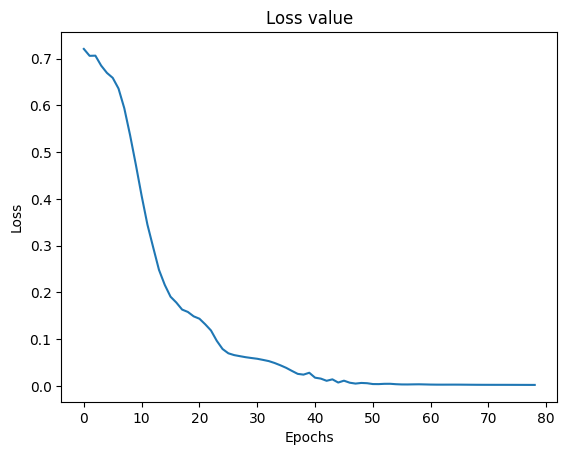

In [5]:
print('Two hidden layers with 3 neurons and 2 neurons in each layer\n')

clfs_model=MLPClassifier(hidden_layer_sizes=(3,2),activation='logistic',max_iter=500,
                         solver='adam',learning_rate='constant',learning_rate_init=0.3)
clfs_model.fit(X_train,y_train)

y_s_predict=clfs_model.predict(X_test)

cm_s=confusion_matrix(y_test,y_s_predict)
print('Confusion matrix\n',cm_s)

acc_s=accuracy_score(y_test,y_s_predict)
print('\nAccuracy : ',acc_s)

print('\nClassification Report\n',classification_report(y_test,y_s_predict)) 
print('\nCoefficients\n',clfs_model.coefs_) 
print('\nIntercept\n',clfs_model.intercepts_) 
print('\n') 
loss_value=clfs_model.loss_curve_ 
plt.plot(loss_value) 
plt.title('Loss value')
plt.xlabel('Epochs') 
plt.ylabel('Loss')